In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install koreanize-matplotlib
import koreanize_matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 53.5 MB/s eta 0:00:00


In [ ]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DScover 25-1/메인프로젝트2025-1_DScover/공모전_data.csv")

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
!pip install optuna
import optuna
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from xgboost import XGBRegressor
from sklearn.cluster import KMeans

# 데이터 로드 및 기본 전처리
df['기상관측일시'] = pd.to_datetime(df['기상관측일시'])
df.set_index('기상관측일시', inplace=True)
df['월'] = df.index.month
df['일'] = df.index.day
df['시'] = df.index.hour

# 예측값 기반 파생변수 생성
df["기온_곱_습도"] = df["예측_기온"] * df["예측_습도"]
df["습도_대기압_비"] = df["예측_습도"] / df["예측_대기압"]
df["기온_곱_절대습도"] = df["예측_기온"] * df["예측_절대습도"]
df["절대습도_비율"] = df["예측_절대습도"] / (df["예측_대기압"] + 1e-5)

# 예측값 기반 클러스터링
cluster_features = df[["예측_기온", "예측_습도", "예측_대기압"]].dropna()
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(cluster_features)
df.loc[cluster_features.index, "기상_패턴_군집"] = cluster_labels
df["기상_패턴_군집"] = df["기상_패턴_군집"].astype("Int64")  # 결측 허용 정수형

# 타깃 및 가중치 정의
target_cols = ['관측_습도', '관측_대기압', '관측_기온']
weights = {'관측_습도': 0.3, '관측_대기압': 0.2, '관측_기온': 0.5}

# 결측치 제거 (lag 생성으로 생긴 NaN 제거 포함)
df = df.dropna()

# Train/Test 분할
test_df = df[(df.index.year == 2025) & (df.index.month == 3)]
train_df = df[df.index < test_df.index.min()]

# 예측에 사용할 feature 목록
extra_features = [
    '예측_기온', '예측_습도', '예측_절대습도', '예측_일사량', '예측_대기압',
    '월', '일', '시',
    '기온_곱_습도', '습도_대기압_비', '기상_패턴_군집',
    '기온_곱_절대습도', '절대습도_비율'
]

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 395.9/395.9 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.7/242.7 kB 15.3 MB/s eta 0:00:00


[I 2025-06-29 16:56:26,335] A new study created in memory with name: no-name-406e530c-a537-4084-974d-4d18a1696571



📌 Target: 관측_습도 – Optuna 튜닝 중...


[I 2025-06-29 16:56:29,269] Trial 0 finished with value: 8.031534609880875 and parameters: {'n_estimators': 90, 'max_depth': 4, 'learning_rate': 0.13690999469104348, 'subsample': 0.8408816853040004, 'colsample_bytree': 0.7246133310663865}. Best is trial 0 with value: 8.031534609880875.
[I 2025-06-29 16:56:33,651] Trial 1 finished with value: 6.296289248303449 and parameters: {'n_estimators': 67, 'max_depth': 10, 'learning_rate': 0.2433712277345818, 'subsample': 0.9235831870581754, 'colsample_bytree': 0.6095990772735513}. Best is trial 1 with value: 6.296289248303449.
[I 2025-06-29 16:56:38,350] Trial 2 finished with value: 6.158070421473121 and parameters: {'n_estimators': 137, 'max_depth': 9, 'learning_rate': 0.20129330035083629, 'subsample': 0.6743576358780872, 'colsample_bytree': 0.733184146772508}. Best is trial 2 with value: 6.158070421473121.
[I 2025-06-29 16:56:39,681] Trial 3 finished with value: 5.925576911656594 and parameters: {'n_estimators': 251, 'max_depth': 7, 'learning_

✅ 관측_습도 Best Params: {'n_estimators': 276, 'max_depth': 7, 'learning_rate': 0.22910764234431535, 'subsample': 0.6463396589500972, 'colsample_bytree': 0.9889359312907017}


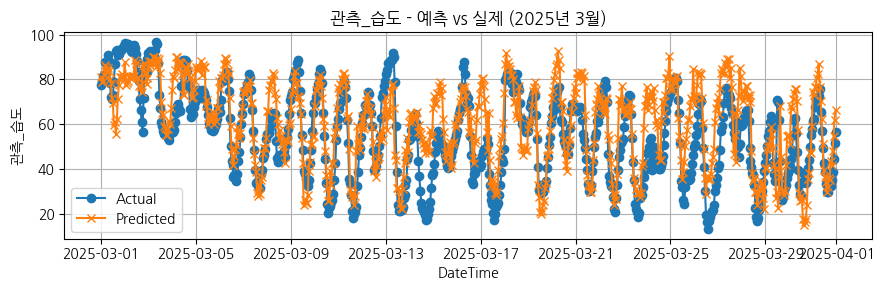

[I 2025-06-29 16:57:49,294] A new study created in memory with name: no-name-32331cd8-38e8-4bdd-8c30-3434ec8234e6



📌 Target: 관측_대기압 – Optuna 튜닝 중...


[I 2025-06-29 16:57:50,168] Trial 0 finished with value: 0.5294177357644395 and parameters: {'n_estimators': 172, 'max_depth': 3, 'learning_rate': 0.17144362730838858, 'subsample': 0.8685059535389048, 'colsample_bytree': 0.5242689807502654}. Best is trial 0 with value: 0.5294177357644395.
[I 2025-06-29 16:57:51,824] Trial 1 finished with value: 0.4212630800413394 and parameters: {'n_estimators': 227, 'max_depth': 4, 'learning_rate': 0.2343952552175866, 'subsample': 0.7229602667400092, 'colsample_bytree': 0.9736456798075872}. Best is trial 1 with value: 0.4212630800413394.
[I 2025-06-29 16:57:54,940] Trial 2 finished with value: 0.4115594226086512 and parameters: {'n_estimators': 267, 'max_depth': 10, 'learning_rate': 0.10320015635098975, 'subsample': 0.9573698771024681, 'colsample_bytree': 0.560305218007167}. Best is trial 2 with value: 0.4115594226086512.
[I 2025-06-29 16:57:58,323] Trial 3 finished with value: 0.40901195313625804 and parameters: {'n_estimators': 280, 'max_depth': 10,

✅ 관측_대기압 Best Params: {'n_estimators': 238, 'max_depth': 8, 'learning_rate': 0.11741294489170499, 'subsample': 0.7666149365728476, 'colsample_bytree': 0.9188465001191776}


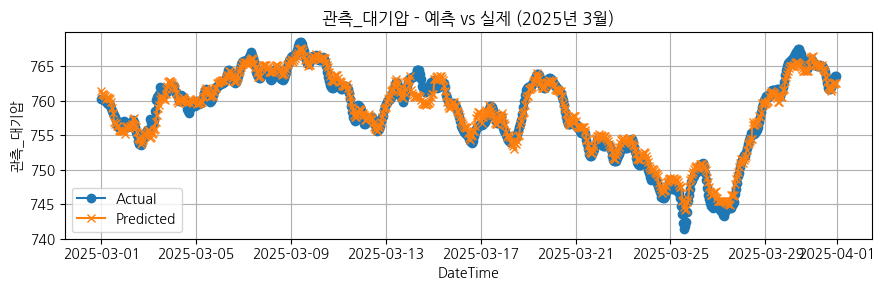

[I 2025-06-29 16:59:29,823] A new study created in memory with name: no-name-eed100ef-26d4-4298-afdb-56e996f9ea5e



📌 Target: 관측_기온 – Optuna 튜닝 중...


[I 2025-06-29 16:59:30,029] Trial 0 finished with value: 1.2297843960190302 and parameters: {'n_estimators': 64, 'max_depth': 6, 'learning_rate': 0.19895711781150546, 'subsample': 0.6896397708044395, 'colsample_bytree': 0.7050506146944248}. Best is trial 0 with value: 1.2297843960190302.
[I 2025-06-29 16:59:30,620] Trial 1 finished with value: 1.0514386827168307 and parameters: {'n_estimators': 298, 'max_depth': 5, 'learning_rate': 0.2111807634538393, 'subsample': 0.7940947643911989, 'colsample_bytree': 0.9031399857407654}. Best is trial 1 with value: 1.0514386827168307.
[I 2025-06-29 16:59:30,893] Trial 2 finished with value: 1.1713189334507805 and parameters: {'n_estimators': 97, 'max_depth': 6, 'learning_rate': 0.1945268600622173, 'subsample': 0.911423277583667, 'colsample_bytree': 0.5464438029253478}. Best is trial 1 with value: 1.0514386827168307.
[I 2025-06-29 16:59:31,288] Trial 3 finished with value: 1.1096859503763061 and parameters: {'n_estimators': 202, 'max_depth': 5, 'lear

✅ 관측_기온 Best Params: {'n_estimators': 287, 'max_depth': 7, 'learning_rate': 0.17514714052250718, 'subsample': 0.7186268806239003, 'colsample_bytree': 0.9138770716494917}


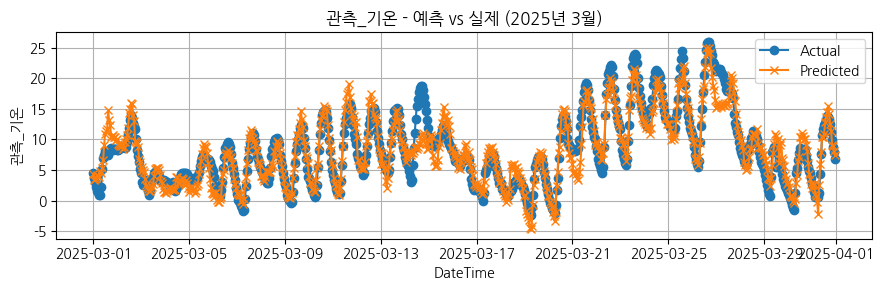

In [ ]:
# 타깃별 모델링 (Optuna 튜닝 포함)
results = {}
models = {}
sRMSE = 0
sMAE = 0

for col in target_cols:
    print(f"\n📌 Target: {col} – Optuna 튜닝 중...")

    feature_cols = extra_features

    X_full = train_df[feature_cols]
    y_full = train_df[col]
    X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(
        X_full, y_full, test_size=0.2, random_state=42
    )

    def objective(trial):
        params = {
            "n_estimators": trial.suggest_int("n_estimators", 50, 300),
            "max_depth": trial.suggest_int("max_depth", 3, 10),
            "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3),
            "subsample": trial.suggest_float("subsample", 0.5, 1.0),
            "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 1.0),
            "random_state": 42,
            "n_jobs": -1,
        }
        model = XGBRegressor(**params)
        model.fit(X_train_split, y_train_split)
        preds = model.predict(X_val_split)
        return np.sqrt(mean_squared_error(y_val_split, preds))

    study = optuna.create_study(direction="minimize")
    study.optimize(objective, n_trials=50)
    best_params = study.best_params

    print(f"✅ {col} Best Params: {best_params}")

    # 전체 train으로 학습
    X_train = train_df[feature_cols]
    y_train = train_df[col]
    X_test = test_df[feature_cols]
    y_test = test_df[col]

    model = XGBRegressor(**best_params)
    model.fit(X_train, y_train)
    models[col] = model

    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    w = weights[col]

    sRMSE += w * rmse
    sMAE += w * mae

    results[col] = {
        'rmse': rmse, 'mae': mae,
        'w_rmse': w * rmse, 'w_mae': w * mae,
        'best_params': best_params
    }

    # 시각화
    plt.figure(figsize=(9,3))
    plt.plot(y_test.index, y_test.values, label='Actual', marker='o')
    plt.plot(y_test.index, y_pred, label='Predicted', marker='x')
    plt.title(f'{col} - 예측 vs 실제 (2025년 3월)')
    plt.xlabel('DateTime')
    plt.ylabel(col)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [ ]:
# 종합 지표
sAError = (sRMSE + sMAE) / 2
print("\n✅ 최종 종합 평가 지표 (가중 평균)")
print(f"sRMSE  = {sRMSE:.4f}")
print(f"sMAE   = {sMAE:.4f}")
print(f"sAError = {sAError:.4f}")

# 변수별 결과 출력
for col in target_cols:
    r = results[col]
    print(f"\n📌 {col}")
    print(f"  - RMSE       : {r['rmse']:.4f}")
    print(f"  - MAE        : {r['mae']:.4f}")
    print(f"  - W * RMSE   : {r['w_rmse']:.4f}")
    print(f"  - W * MAE    : {r['w_mae']:.4f}")
    print(f"  - Best Params: {r['best_params']}")



✅ 최종 종합 평가 지표 (가중 평균)
sRMSE  = 5.2176
sMAE   = 3.9869
sAError = 4.6023

📌 관측_습도
  - RMSE       : 13.3674
  - MAE        : 10.3363
  - W * RMSE   : 4.0102
  - W * MAE    : 3.1009
  - Best Params: {'n_estimators': 276, 'max_depth': 7, 'learning_rate': 0.22910764234431535, 'subsample': 0.6463396589500972, 'colsample_bytree': 0.9889359312907017}

📌 관측_대기압
  - RMSE       : 0.9723
  - MAE        : 0.7350
  - W * RMSE   : 0.1945
  - W * MAE    : 0.1470
  - Best Params: {'n_estimators': 238, 'max_depth': 8, 'learning_rate': 0.11741294489170499, 'subsample': 0.7666149365728476, 'colsample_bytree': 0.9188465001191776}

📌 관측_기온
  - RMSE       : 2.0258
  - MAE        : 1.4780
  - W * RMSE   : 1.0129
  - W * MAE    : 0.7390
  - Best Params: {'n_estimators': 287, 'max_depth': 7, 'learning_rate': 0.17514714052250718, 'subsample': 0.7186268806239003, 'colsample_bytree': 0.9138770716494917}


In [ ]:
feature_cols

['예측_기온',
 '예측_습도',
 '예측_절대습도',
 '예측_일사량',
 '예측_대기압',
 '월',
 '일',
 '시',
 '기온_곱_습도',
 '습도_대기압_비',
 '기상_패턴_군집',
 '기온_곱_절대습도',
 '절대습도_비율']

/tmp/ipython-input-9-35216575.py:17: UserWarning: Glyph 128204 (\N{PUSHPIN}) missing from font(s) NanumGothic.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128204 (\N{PUSHPIN}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


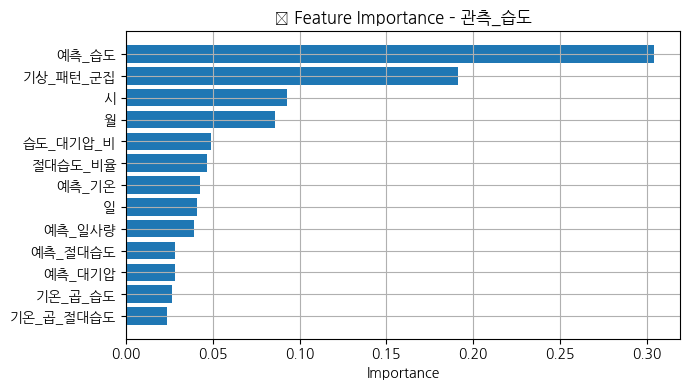

/tmp/ipython-input-9-35216575.py:17: UserWarning: Glyph 128204 (\N{PUSHPIN}) missing from font(s) NanumGothic.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128204 (\N{PUSHPIN}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


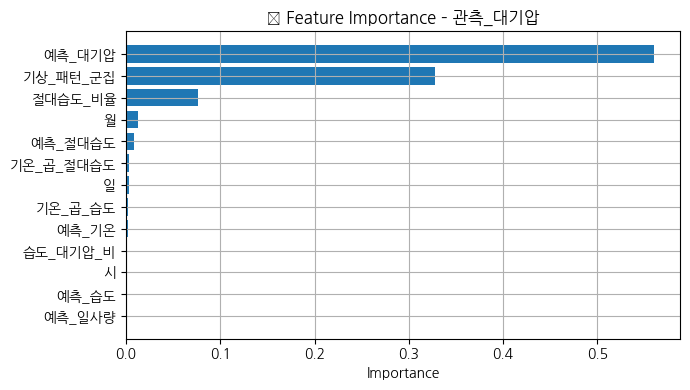

/tmp/ipython-input-9-35216575.py:17: UserWarning: Glyph 128204 (\N{PUSHPIN}) missing from font(s) NanumGothic.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128204 (\N{PUSHPIN}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


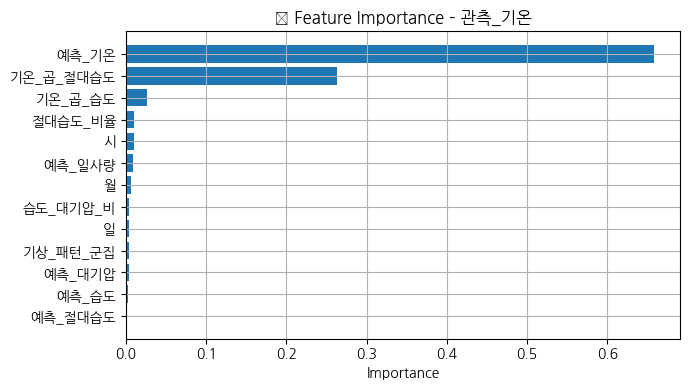

In [ ]:
# 타깃별로 feature importance 시각화
importances = {}

for col in target_cols:
    model = models[col]
    plt.figure(figsize=(7,4))
    xgb_importance = model.feature_importances_
    features = X_train.columns
    sorted_idx = np.argsort(xgb_importance)[::-1][:20]  # 상위 20개만 보기

    plt.barh(range(len(sorted_idx)), xgb_importance[sorted_idx], align='center')
    plt.yticks(range(len(sorted_idx)), [features[i] for i in sorted_idx])
    plt.xlabel('Importance')
    plt.title(f'📌 Feature Importance – {col}')
    plt.gca().invert_yaxis()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # 중요도 저장
    importances[col] = pd.Series(xgb_importance, index=features)


📌 SHAP 분석 – 관측_습도


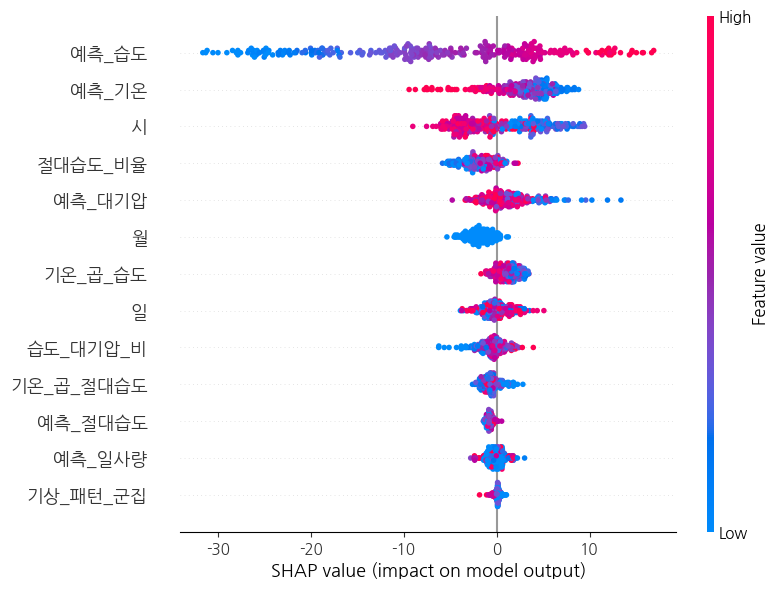


📌 SHAP Waterfall – 예시 관측치 (Target: 관측_습도)


/usr/local/lib/python3.11/dist-packages/shap/plots/_waterfall.py:279: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumGothic.
  text_bbox = txt_obj.get_window_extent(renderer=renderer)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


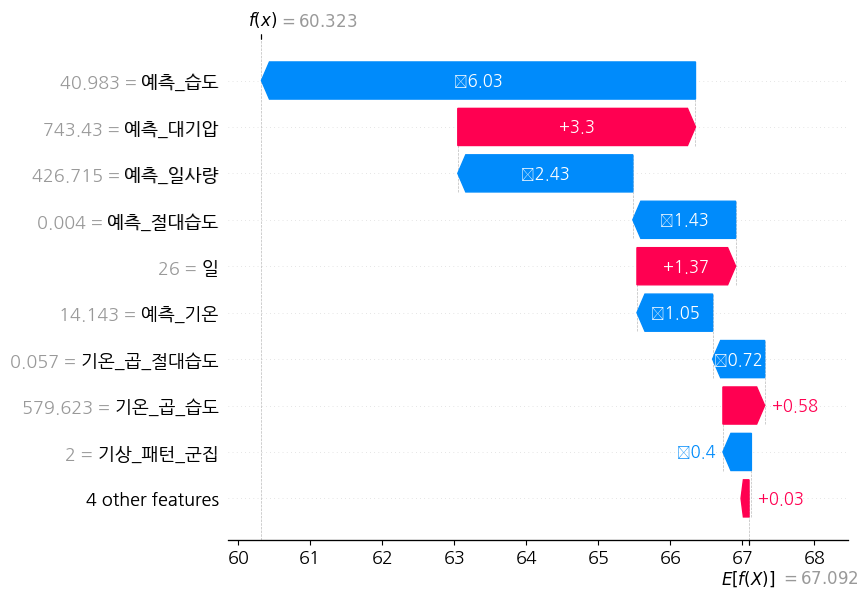


📌 SHAP 분석 – 관측_대기압


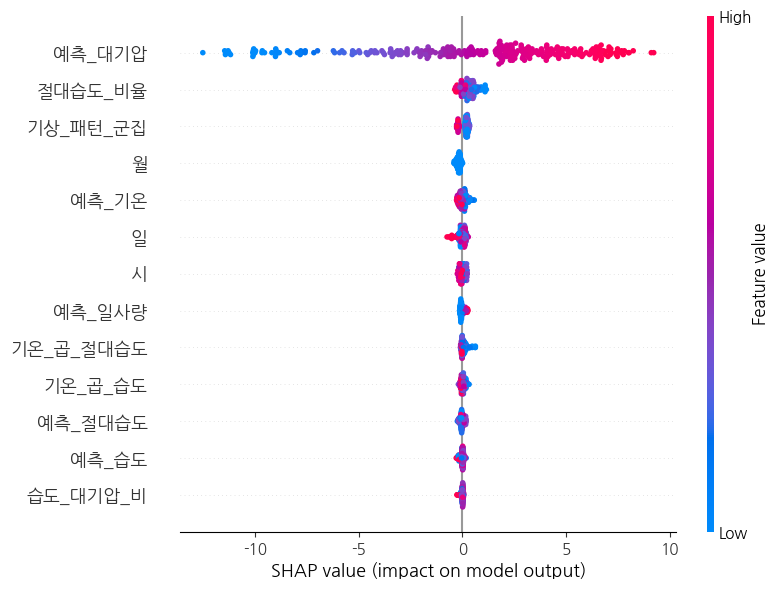


📌 SHAP Waterfall – 예시 관측치 (Target: 관측_대기압)


/usr/local/lib/python3.11/dist-packages/shap/plots/_waterfall.py:279: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumGothic.
  text_bbox = txt_obj.get_window_extent(renderer=renderer)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


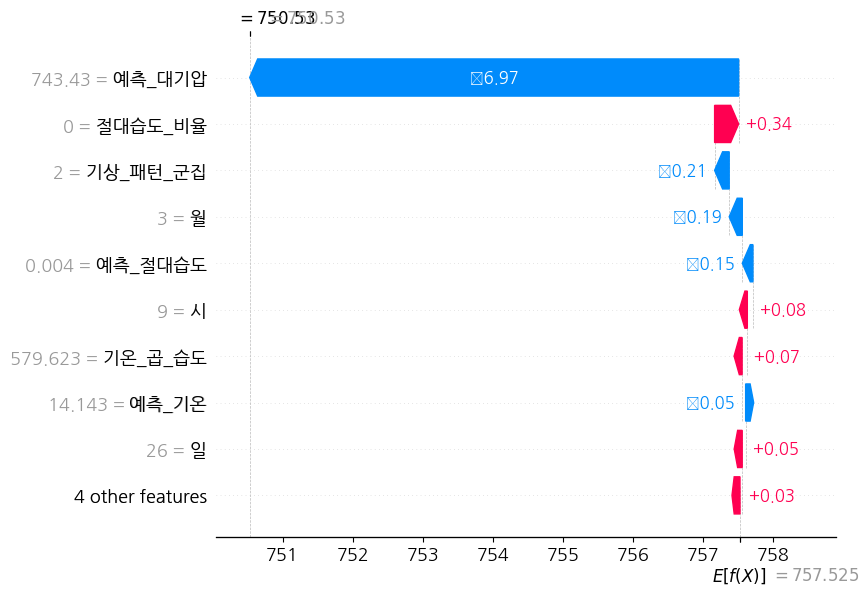


📌 SHAP 분석 – 관측_기온


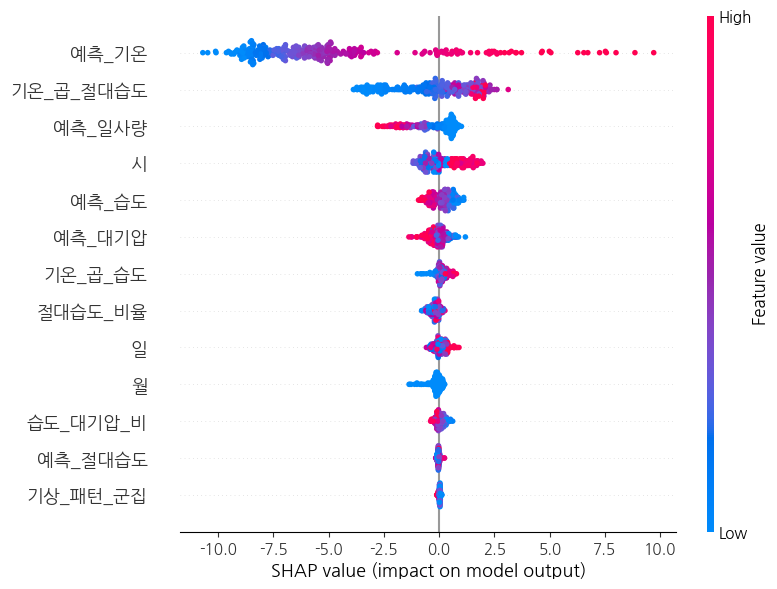


📌 SHAP Waterfall – 예시 관측치 (Target: 관측_기온)


/usr/local/lib/python3.11/dist-packages/shap/plots/_waterfall.py:279: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumGothic.
  text_bbox = txt_obj.get_window_extent(renderer=renderer)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


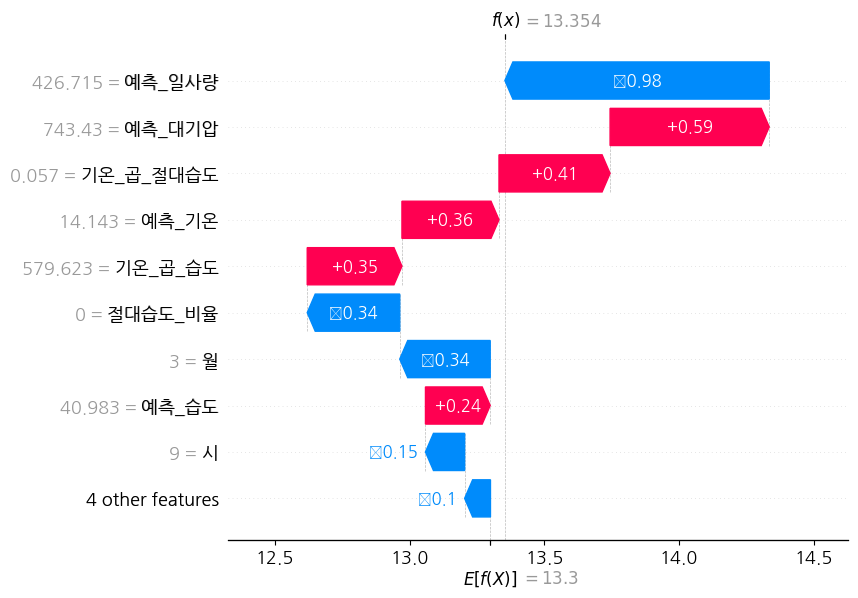

In [ ]:
import shap
import matplotlib.pyplot as plt

# 샘플 수 설정 (계산 부담 줄이기 위함)
n_sample = 300

# 타깃별 SHAP 분석 반복
for col in target_cols:
    print(f"\n📌 SHAP 분석 – {col}")

    # 테스트 데이터에서 feature subset 추출
    X_sample = test_df[feature_cols].sample(n=n_sample, random_state=42)

    # 해당 타깃 모델로 explainer 생성 및 shap 값 계산
    explainer = shap.Explainer(models[col])
    shap_values = explainer(X_sample)

    # SHAP beeswarm plot (전체 feature 기여도 분포)
    shap.plots.beeswarm(shap_values, max_display=20)

    # 예시 1개: local explanation (해당 row의 예측에 어떤 피처가 작용했는지)
    print(f"\n📌 SHAP Waterfall – 예시 관측치 (Target: {col})")
    shap.plots.waterfall(shap_values[0])

In [ ]:
import pandas as pd
import numpy as np
from datetime import timedelta

# 타깃 컬럼 목록과 이미 학습된 모델 딕셔너리
target_cols = ['관측_습도', '관측_대기압', '관측_기온']
# models = {'관측_습도': model1, '관측_대기압': model2, '관측_기온': model3}  ← 이미 정의돼 있어야 함

# 원본 데이터 불러오기
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DScover 25-1/메인프로젝트2025-1_DScover/공모전_data.csv")
df['기상관측일시'] = pd.to_datetime(df['기상관측일시'])
df.set_index('기상관측일시', inplace=True)

# 예측값 기반 파생변수 생성
df["기온_곱_습도"] = df["예측_기온"] * df["예측_습도"]
df["습도_대기압_비"] = df["예측_습도"] / df["예측_대기압"]
df["기온_곱_절대습도"] = df["예측_기온"] * df["예측_절대습도"]
df["절대습도_비율"] = df["예측_절대습도"] / (df["예측_대기압"] + 1e-5)

# 예측값 기반 클러스터링
cluster_features = df[["예측_기온", "예측_습도", "예측_대기압"]].dropna()
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(cluster_features)
df.loc[cluster_features.index, "기상_패턴_군집"] = cluster_labels
df["기상_패턴_군집"] = df["기상_패턴_군집"].astype("Int64")  # 결측 허용 정수형

for col in target_cols:
    df.loc[(df.index.date == pd.to_datetime('2025-03-31').date()), col] = np.nan

# 시작과 끝 시간 정의
start_time = pd.Timestamp('2025-03-31 00:00')
end_time = pd.Timestamp('2025-03-31 23:00')

# 슬라이싱해서 새로운 DataFrame 생성
subset_df = df.loc[start_time:end_time].copy()
subset_df

,관측_습도,관측_기온,관측_대기압,예측_일사량,예측_습도,예측_절대습도,예측_기온,예측_대기압,월,일,시,기온_곱_습도,습도_대기압_비,기온_곱_절대습도,절대습도_비율,기상_패턴_군집
기상관측일시,,,,,,,,,,,,,,,,
2025-03-31 00:00:00,NaN,NaN,NaN,0.000000,39.207001,0.002,-0.691999,759.216064,3,31,0,-27.131222,0.051641,-0.001384,0.000003,1
2025-03-31 01:00:00,NaN,NaN,NaN,0.000000,43.692001,0.003,-0.407000,758.845520,3,31,1,-17.782627,0.057577,-0.001221,0.000004,1
2025-03-31 02:00:00,NaN,NaN,NaN,0.000000,44.277000,0.003,-0.695999,758.627380,3,31,2,-30.816754,0.058365,-0.002088,0.000004,1
2025-03-31 03:00:00,NaN,NaN,NaN,0.000000,46.292999,0.003,-1.002001,758.398926,3,31,3,-46.385623,0.061040,-0.003006,0.000004,1
2025-03-31 04:00:00,NaN,NaN,NaN,0.000000,47.687000,0.003,-1.254000,758.298096,3,31,4,-59.799485,0.062887,-0.003762,0.000004,0
2025-03-31 05:00:00,NaN,NaN,NaN,0.000000,49.853001,0.003,-1.516999,758.332947,3,31,5,-75.626964,0.065740,-0.004551,0.000004,0
2025-03-31 06:00:00,NaN,NaN,NaN,0.000000,49.202999,0.003,-1.725999,758.364136,3,31,6,-84.924321,0.064880,-0.005178,0.000004,0
2025-03-31 07:00:00,NaN,NaN,NaN,78.492996,48.907001,0.003,1.180999,758.548950,3,31,7,57.759110,0.064474,0.003543,0.000004,0
2025-03-31 08:00:00,NaN,NaN,NaN,272.885010,42.224998,0.003,5.365000,758.618591,3,31,8,226.537127,0.055660,0.016095,0.000004,1


In [ ]:
def predict_one(models, row_df):
    X = row_df[feature_cols]
    preds = [models[col].predict(X)[0] for col in target_cols]
    return dict(zip(target_cols, preds))

# 시간 순서대로 결측값 예측 및 채움
for ts in subset_df.index:
    if subset_df.loc[ts, target_cols].isna().any():
        row_df = subset_df.loc[[ts]]  # DF 형태 유지
        preds = predict_one(models, row_df)

        # 예측값을 관측값에 채움
        for col in target_cols:
            subset_df.loc[ts, col] = preds[col]

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DScover 25-1/메인프로젝트2025-1_DScover/공모전_data.csv")
df['기상관측일시'] = pd.to_datetime(df['기상관측일시'])
df.set_index('기상관측일시', inplace=True)
# 2. 예측값 기반 파생변수 생성
df["기온_곱_습도"] = df["예측_기온"] * df["예측_습도"]
df["습도_대기압_비"] = df["예측_습도"] / df["예측_대기압"]
df["기온_곱_절대습도"] = df["예측_기온"] * df["예측_절대습도"]
df["절대습도_비율"] = df["예측_절대습도"] / (df["예측_대기압"] + 1e-5)

# 3. 예측값 기반 클러스터링
cluster_features = df[["예측_기온", "예측_습도", "예측_대기압"]].dropna()
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(cluster_features)
df.loc[cluster_features.index, "기상_패턴_군집"] = cluster_labels
df["기상_패턴_군집"] = df["기상_패턴_군집"].astype("Int64")  # 결측 허용 정수형

actual = df.loc['2025-03-31']
actual_data = actual[['관측_습도', '관측_기온', '관측_대기압']]
subset_data = subset_df[['관측_습도', '관측_기온', '관측_대기압']]

In [ ]:
actual_data

,관측_습도,관측_기온,관측_대기압
기상관측일시,,,
2025-03-31 00:00:00,61.48,2.77,765.60910
2025-03-31 01:00:00,62.24,2.31,765.49436
2025-03-31 02:00:00,67.73,1.42,765.36447
2025-03-31 03:00:00,71.33,0.66,765.20855
2025-03-31 04:00:00,72.28,0.65,765.03071
2025-03-31 05:00:00,71.61,0.59,765.01209
2025-03-31 06:00:00,72.44,0.54,765.06335
2025-03-31 07:00:00,75.78,1.28,765.22093
2025-03-31 08:00:00,65.29,4.28,765.05137


In [ ]:
subset_data

,관측_습도,관측_기온,관측_대기압
기상관측일시,,,
2025-03-31 00:00:00,74.218796,2.108023,766.519653
2025-03-31 01:00:00,73.085251,2.541906,765.279114
2025-03-31 02:00:00,76.405457,2.745462,765.173096
2025-03-31 03:00:00,76.455826,1.126597,765.300598
2025-03-31 04:00:00,80.644081,0.729432,765.006165
2025-03-31 05:00:00,82.222435,-0.170886,765.114441
2025-03-31 06:00:00,86.867378,-2.186091,765.221436
2025-03-31 07:00:00,76.715866,2.574660,765.087646
2025-03-31 08:00:00,70.475357,5.974108,764.819153


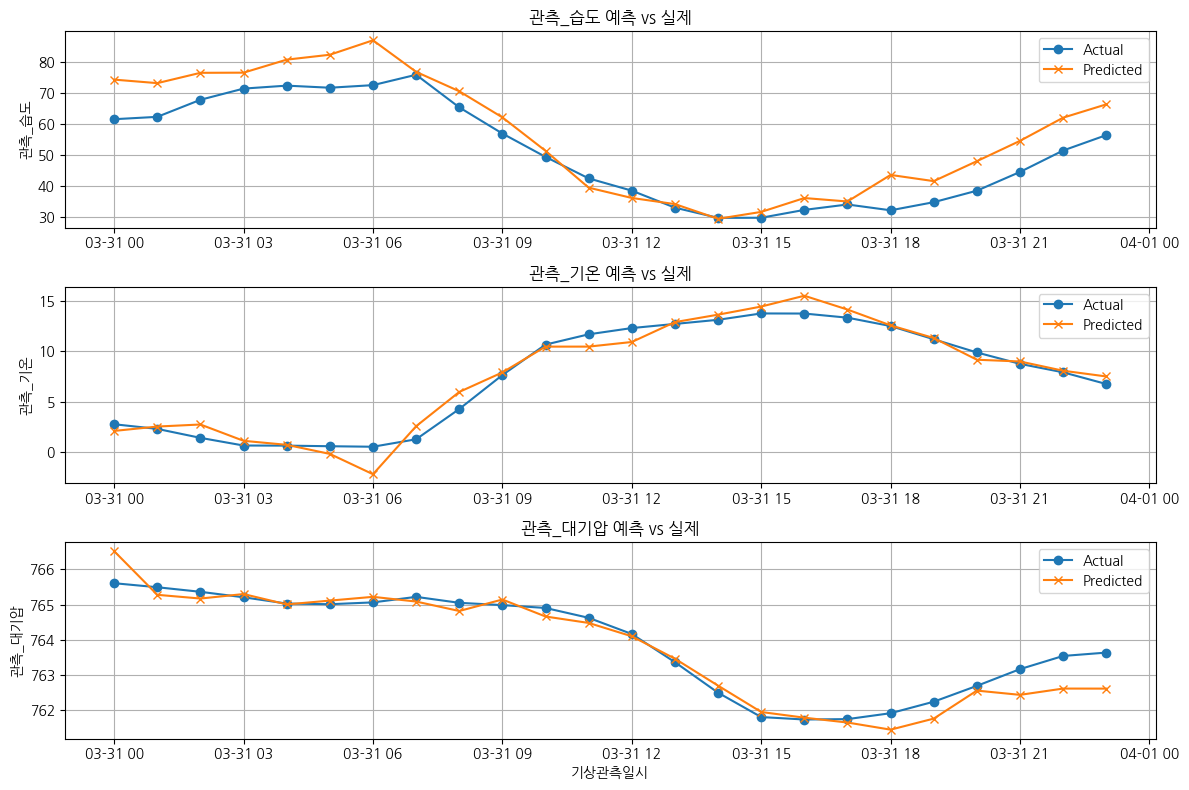

In [ ]:
import matplotlib.pyplot as plt

# 그래프 크기 설정
plt.figure(figsize=(12, 8))

# 변수 목록
variables = ['관측_습도', '관측_기온', '관측_대기압']

# 변수별 그래프
for i, col in enumerate(variables):
    plt.subplot(3, 1, i + 1)

    # 실제값
    plt.plot(actual_data.index, actual_data[col], label='Actual', marker='o')

    # 예측값
    plt.plot(subset_data.index, subset_data[col], label='Predicted', marker='x')

    plt.title(f'{col} 예측 vs 실제')
    plt.ylabel(col)
    plt.legend()
    plt.grid(True)

plt.xlabel('기상관측일시')
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

print("평가 지표 (2025-03-31):\n")

for col in variables:
    y_true = actual_data[col].dropna()
    y_pred = subset_data.loc[y_true.index, col]  # 같은 인덱스만 비교

    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)

    print(f"{col} - RMSE: {rmse:.4f}, MAE: {mae:.4f}")

평가 지표 (2025-03-31):

관측_습도 - RMSE: 7.7482, MAE: 6.4841
관측_기온 - RMSE: 1.0051, MAE: 0.7626
관측_대기압 - RMSE: 0.4149, MAE: 0.2929
